**Title**

**Introduction**

This project utilizes data gathered by Frank Wood's research group in UBC computer science. Their research focused on video games and how people play videogames, specifically by creating a MineCraft server and collecting data from players. This data included information like demographics, as well as information about play on the server. They had three broader questions that they wanted to explore regarding information that would be important for running the project. My project aims to provide some answers relating to one of these questions using a model created from the provided data. 

The broader question that I chose to look at was what player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types. From this, I formed my question of: can the number of hours played and the age of a player predict the subscription status of a player in the players dataset?

The players dataset consists of descriptive information about players in a MineCraft server set up by the research group. There are 196 observations in the dataset and seven different variables for each observation. The variables are as follows: <br>
<br>
`experience` (chr) - how experienced a player is with MineCraft <br>
`subscribe` (lgl) - whether the player is subscribed to the MineCraft newsletter <br>
`hashed_email` (chr) - hashed/encrypted email of the player <br>
`played_hours` (dbl) - number of hours played on the server <br>
`name` (chr) - name of the player <br>
`gender` (chr) - gender the player identifies as <br>
`age` (dbl) - age of the player <br>
<br>
For `played_hours`, the range of observations was from 0.0hr to 223.1hr, and for `age` the range of observations was from 8 to 50. Upon initial observation of the dataset, there were no obvious issues with the data, although the column names had to be adjusted and `subscribe` was changed to a factor instead of a logical category. One potential concern that was considered was whether there would be enough data for both the true and false observations in subscription status to create a model. 

**Methods and Results**

In [1]:
#loading libraries

library(tidyverse)
library(tidymodels)
library(themis)
library(janitor)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [40]:
# reading in data
options(repr.matrix.max.rows = 6)

minecraft <- read_csv("players.csv") |>
clean_names() |>
mutate(subscribe = as_factor(subscribe))
minecraft

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashed_email,played_hours,name,gender,age
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


want to isolate subscribe, played hours, and age

In [41]:
#selecting for variables of interest
minecraft_small <- minecraft |>
    select(subscribe, played_hours, age) 
minecraft_small

subscribe,played_hours,age
<fct>,<dbl>,<dbl>
TRUE,30.3,9
TRUE,3.8,17
FALSE,0.0,17
⋮,⋮,⋮
FALSE,0.0,17
FALSE,2.3,17
TRUE,0.2,NA


making a visual

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


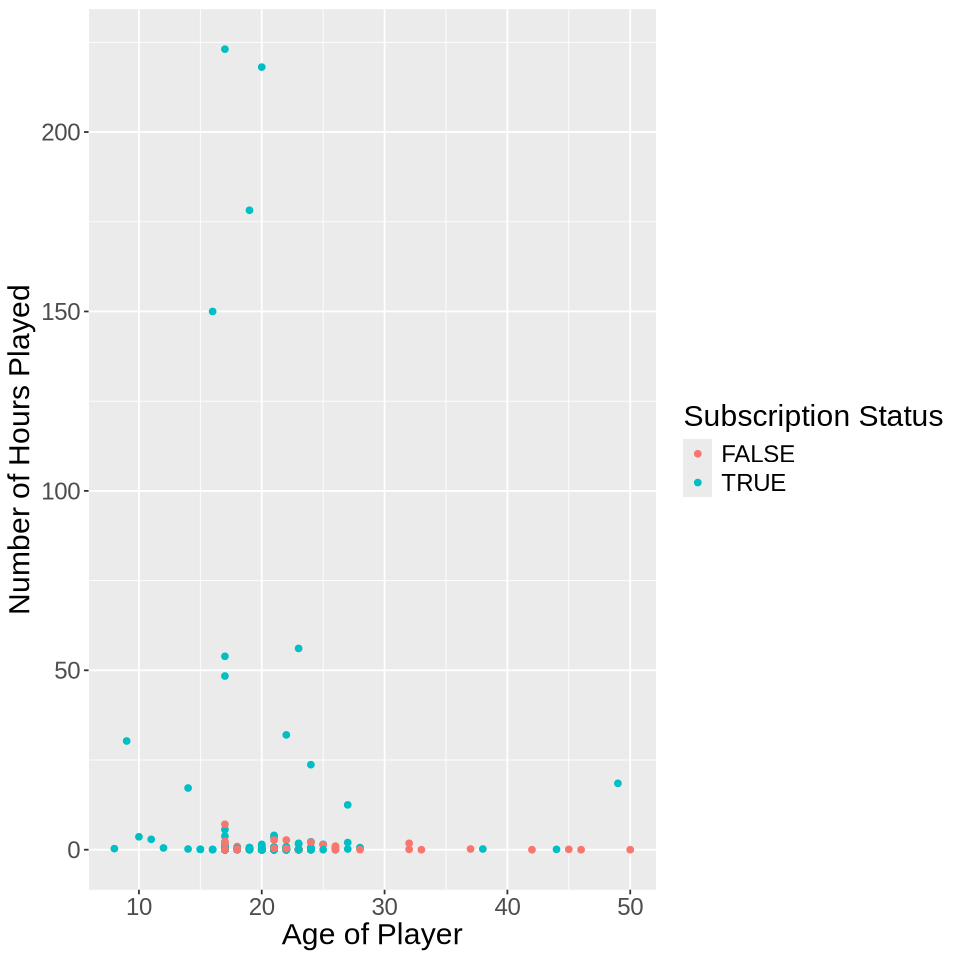

In [42]:
#creating an initial plot to visualize the data
options(repr.plot.height = 8, repr.plot.width = 8)

minecraft_plot <- ggplot(minecraft_small, aes(x = age, y = played_hours, color = subscribe)) +
    geom_point() +
    labs(x= "Age of Player", y = "Number of Hours Played", color = "Subscription Status") +
    theme(text= element_text(size = 18))
minecraft_plot

standardize data 

In [43]:
#create a recipe and standardizing the data
set.seed(9999)

minecraft_recipe <- recipe(subscribe ~ age + played_hours, data = minecraft) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())
minecraft_recipe

minecraft_scaled <- prep(minecraft_recipe) |>
    bake(minecraft) |>
    mutate(subscribe = as_factor(subscribe))
minecraft_scaled



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



age,played_hours,subscribe
<dbl>,<dbl>,<fct>
-1.8657878,0.86235447,TRUE
-0.5701714,-0.07214775,TRUE
-0.5701714,-0.20615184,FALSE
⋮,⋮,⋮
-0.5701714,-0.2061518,FALSE
-0.5701714,-0.1250441,FALSE
NA,-0.1990990,TRUE


creating standardized plot

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


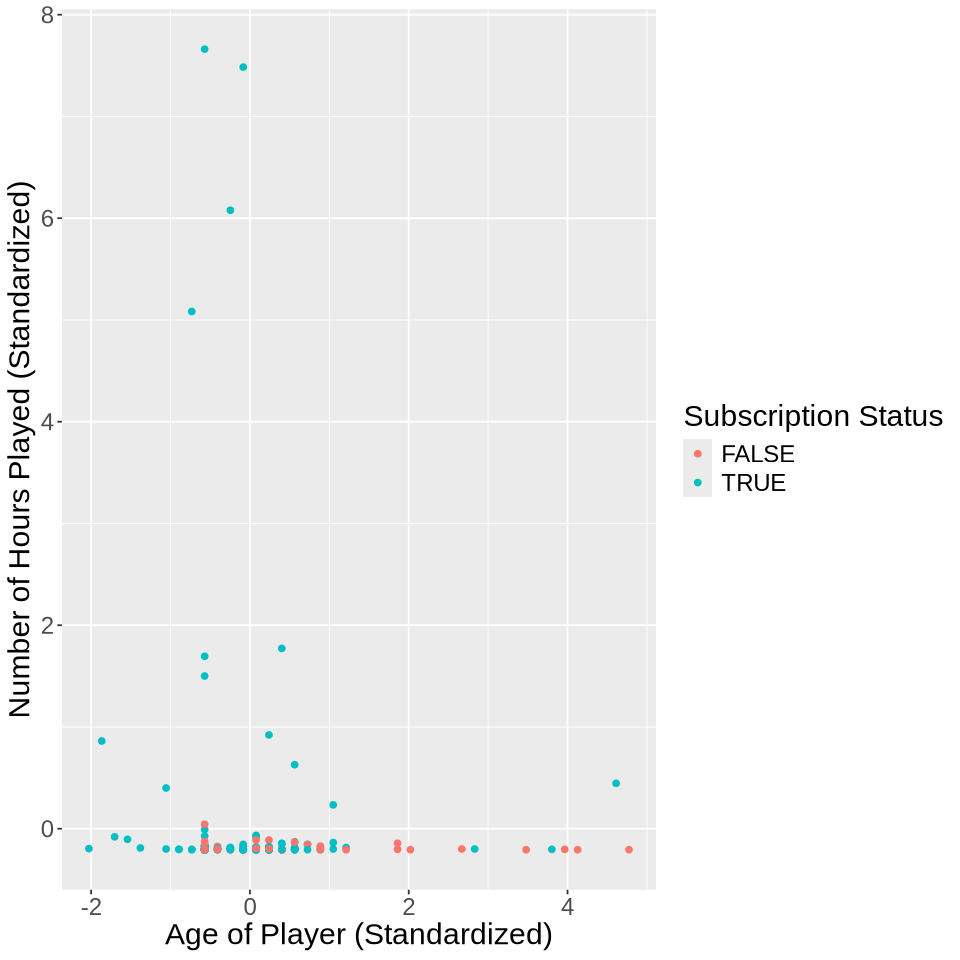

In [44]:
#creating a new plot with the standardized data
minecraft_scaled_plot <- ggplot(minecraft_scaled,  aes(x = age, y = played_hours, color = subscribe)) +
    geom_point() +
    labs(x= "Age of Player (Standardized)", y = "Number of Hours Played (Standardized)", color = "Subscription Status") +
    theme(text= element_text(size = 18))

minecraft_scaled_plot

split data into training and testing

In [45]:
#splitting data into training data and testing data
set.seed(9999)

minecraft_split <- initial_split(minecraft_scaled, prop = 0.75, strata = subscribe)  
minecraft_train <- training(minecraft_split)   
minecraft_test <- testing(minecraft_split)

minecraft_train

age,played_hours,subscribe
<dbl>,<dbl>,<fct>
-0.57017138,-0.2061518,FALSE
0.07763681,-0.2061518,FALSE
0.23958885,-0.2061518,FALSE
⋮,⋮,⋮
-0.08431524,-0.2061518,TRUE
-0.57017138,-0.2061518,TRUE
NA,-0.1990990,TRUE


In [8]:
#figuring out how many of each category we have
counts <- minecraft_train |>
    group_by(subscribe) |>
    summarize(count = n())

counts

subscribe,count
<fct>,<int>
FALSE,39
TRUE,108


because we want to do classification, we need to have the two categories have similar numbers,so we're going to have to duplicate the false data

In [46]:
#adjusting amount of data in the false category to make the two categories even
minecraft_train_even <- recipe(subscribe ~ age + played_hours, data = minecraft_train) |>
  step_upsample(subscribe, over_ratio = 1, skip = FALSE) |>
  prep() |>
  bake(minecraft_train)
minecraft_train_even


age,played_hours,subscribe
<dbl>,<dbl>,<fct>
0.4015409,-0.2061518,FALSE
-0.5701714,-0.2061518,FALSE
1.2113011,-0.2061518,FALSE
⋮,⋮,⋮
-0.08431524,-0.2061518,TRUE
-0.57017138,-0.2061518,TRUE
NA,-0.1990990,TRUE


In [47]:
#checking that the counts are even
counts_adjusted <- minecraft_train_even |>
    group_by(subscribe) |>
    summarize(count = n())

counts_adjusted

subscribe,count
<fct>,<int>
FALSE,108
TRUE,108


counts are now even, so can continue with making a model

In [48]:
#making a new recipe
minecraft_adj_recipe <- recipe(subscribe ~ age + played_hours, data = minecraft_train_even)
minecraft_adj_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



In [50]:
#making a model 
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")
knn_tune

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [58]:
#making cross validation information and workflow

minecraft_vfold <- vfold_cv(minecraft_train_even, v = 5, strata = subscribe)

k_vals <- tibble(neighbors = seq(from = 1, to = 8, by = 1))

knn_workflow <- workflow() |>
      add_recipe(minecraft_adj_recipe) |>
      add_model(knn_tune)
knn_workflow

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [59]:
#collecting metrics for the workflow to figure out which k value is best
minecraft_results <- knn_workflow|>
    tune_grid(resamples = minecraft_vfold, grid = k_vals) |>
    collect_metrics()
minecraft_results

→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 43 rows.
               ✖ Assigned data has 44 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 44 to size 43.

There were issues with some computations   A: x1

→ B | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 41 rows.
               ✖ Assigned data has 42 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 42 to size 41.

There were issues with some computations   A: x1
There were issues with some computations   A: x1   B: x1





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7622655,3,0.05164781,Preprocessor1_Model1
1,roc_auc,binary,0.7622655,3,0.05164781,Preprocessor1_Model1
2,accuracy,binary,0.7853535,3,0.04064009,Preprocessor1_Model2
⋮,⋮,⋮,⋮,⋮,⋮,⋮
7,roc_auc,binary,0.6668814,3,0.02881588,Preprocessor1_Model7
8,accuracy,binary,0.6388889,3,0.01536051,Preprocessor1_Model8
8,roc_auc,binary,0.6575003,3,0.02411289,Preprocessor1_Model8


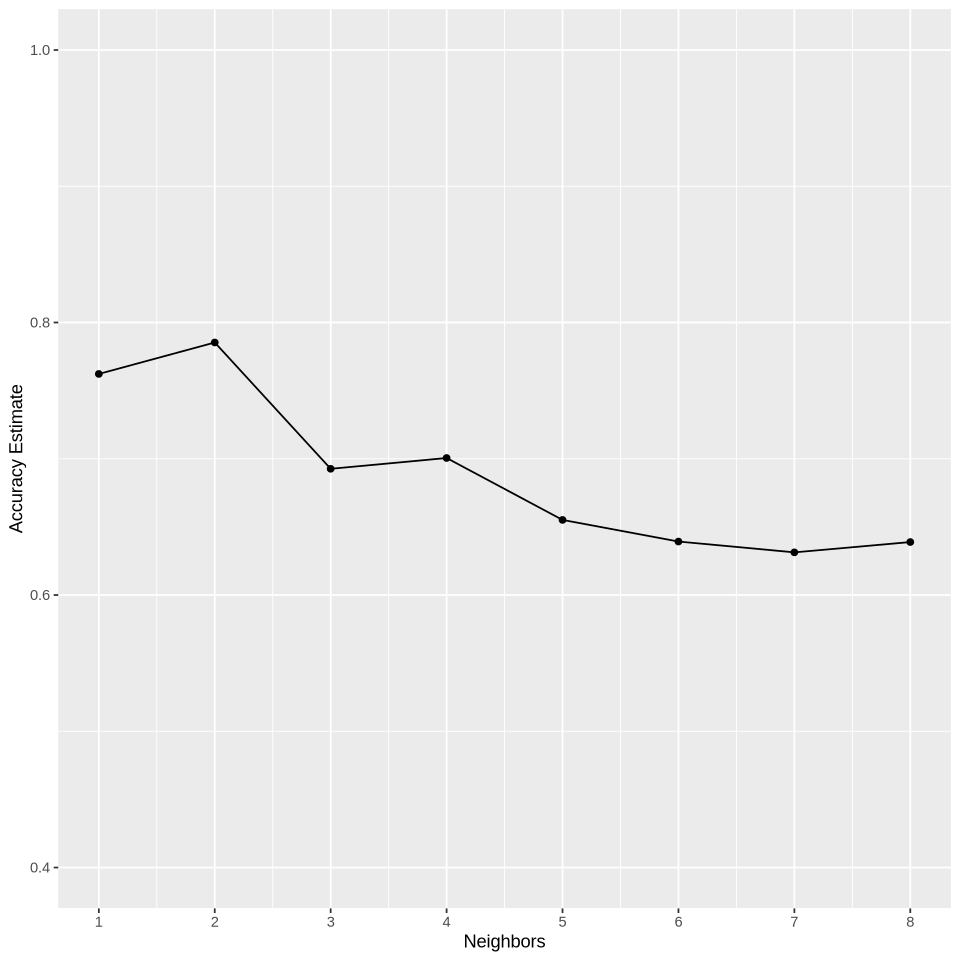

In [61]:
#plotting the number of neighbours and accuracy of the model to figure out how many neighbors is best
accuracies <- minecraft_results |> 
      filter(.metric == "accuracy")

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(0, 14, by = 1)) +  
      scale_y_continuous(limits = c(0.4, 1.0))
accuracy_versus_k

from this, 2 neighbours seems to be the most accurate for this case

In [62]:
#creating a new model specification with the select number of neighbours
#creating a new workflow

minecraft_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 2) |>
         set_engine("kknn") |>
         set_mode("classification")

minecraft_best_fit <- workflow() |>
         add_recipe(minecraft_adj_recipe) |>
         add_model(minecraft_best_spec) |>
         fit(data = minecraft_train_even)
minecraft_best_fit


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(2,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2943925
Best kernel: rectangular
Best k: 2

In [63]:
#using the model on the testing data
minecraft_prediction <- minecraft_best_fit |>
          predict(minecraft_test) |>
          bind_cols(minecraft_test) 
minecraft_prediction


.pred_class,age,played_hours,subscribe
<fct>,<dbl>,<dbl>,<fct>
TRUE,0.07763681,-0.2026254,TRUE
FALSE,-0.57017138,-0.2061518,TRUE
TRUE,-0.24626729,-0.2061518,TRUE
⋮,⋮,⋮,⋮
TRUE,-0.5701714,-0.1990990,FALSE
FALSE,3.8025339,-0.2026254,TRUE
FALSE,-0.5701714,-0.2061518,TRUE


In [64]:
#figuring out accuracy of the model

minecraft_accuracy <- minecraft_prediction |>
    metrics(truth = subscribe, estimate = .pred_class)
minecraft_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.4081633
kap,binary,-0.1092896


In [65]:
#creating a confusion matrix
minecraft_mat <- minecraft_prediction |> 
      conf_mat(truth = subscribe, estimate = .pred_class)
minecraft_mat

          Truth
Prediction FALSE TRUE
     FALSE     6   22
     TRUE      7   14

In [66]:
#calculating recall and precision for true
true_precision <- 14/(7+14) *100
true_precision

true_recall <- 14/(22+14)*100
true_recall

[1] 66.66667

[1] 38.88889

In [67]:
#calculating recall and precision for false
false_precision <- 6/(28) *100
false_precision

false_recall <- 6/(6+7)*100
false_recall

[1] 21.42857

[1] 46.15385